# Проект 8. Рынок заведений общественного питания Москвы

## 1. Предобработка данных

Импортируем нужные библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/rest_data.csv') # импортируем датасет
pd.set_option('max_columns', 105) # устанавливаем возможность просмотра всех столбцов больших датафреймов
data.head(20)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Пропущенных значений нет, тип данных в каждом столбце верный.  
Посмотрим на списки уникальных значений в столбцах с типом заведения и принадлежности к сети.

In [4]:
data['chain'].value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

In [5]:
data['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

Здесь дублирующих значений нет.

## 2. Анализ данных

### Соотношение видов объектов общественного питания

In [6]:
object_type_structure = data.groupby('object_type').size().reset_index(name='count').sort_values(by='count',ascending=False)
object_type_structure

,object_type,count
3,кафе,6099
8,столовая,2587
7,ресторан,2285
6,предприятие быстрого обслуживания,1923
0,бар,856
1,буфет,585
4,кафетерий,398
2,закусочная,360
5,магазин (отдел кулинарии),273


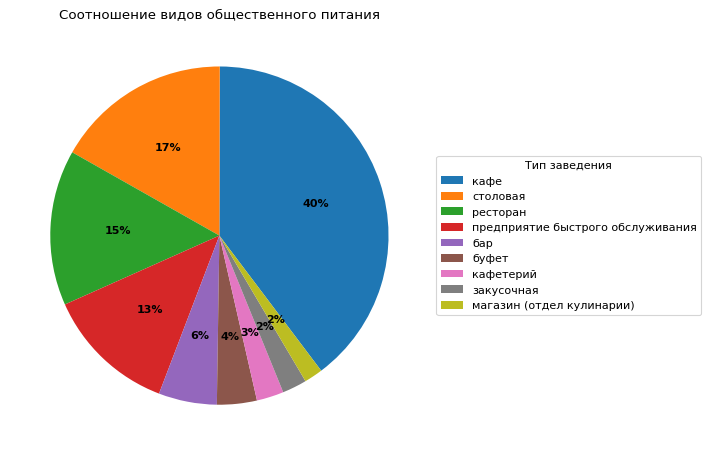

In [7]:
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)
number = object_type_structure['count']
categories = object_type_structure['object_type']

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.0f}%".format(pct)

wedges, texts, autotexts = ax.pie(number, 
                                  autopct=lambda pct: func(pct, number),
                                  textprops=dict(color="k"), 
                                  startangle=-53)

# Decoration
ax.legend(wedges, categories, title="Тип заведения", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Соотношение видов общественного питания")
plt.show()

Наиболее распространенные виды заведений общественного питания - кафе, столовые, рестораны, предприятия быстрого обслуживания.

### Соотношение сетевых и несетевых объектов

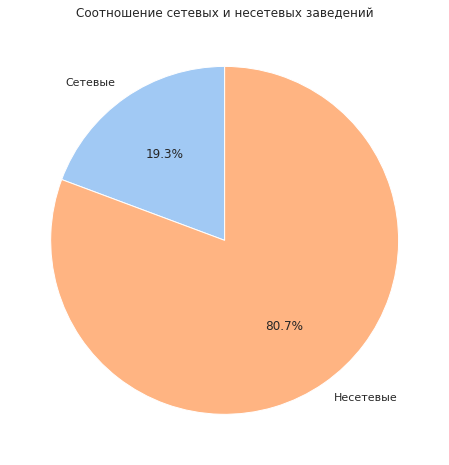

In [8]:
chain = data.groupby('chain')['chain'].count()
sns.set(rc={'figure.figsize':(8,8)})
sns.set_palette('pastel')
labels = 'Сетевые', 'Несетевые'
fig1, ax1 = plt.subplots()
ax1.pie(chain, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Соотношение сетевых и несетевых заведений")
plt.show()

К сетевым относятся менее 20% точек.

### Виды объектов и принадлежность к сетям

Попробуем ответить на вопрос, для какого вида объекта общественного питания характерно сетевое распространение.

In [9]:
types_chain = data.pivot_table(index='object_type', columns='chain', values='id', aggfunc='count').reset_index() #сгруппируем количество сетевых/несетевых точек по типам
types_chain = types_chain.rename(columns={'да':'chains','нет':'not_chains'}) # переименуем столбцы
types_chain['total'] = types_chain['chains'] + types_chain['not_chains'] # создадим столбец с общим количеством точек
types_chain['chains_share'] = types_chain['chains'] / types_chain['total']  # создадим столбец с долей сетей
types_chain = types_chain.sort_values(by='chains_share', ascending=False)
types_chain

chain,object_type,chains,not_chains,total,chains_share
6,предприятие быстрого обслуживания,791,1132,1923,0.411336
5,магазин (отдел кулинарии),78,195,273,0.285714
7,ресторан,544,1741,2285,0.238074
3,кафе,1396,4703,6099,0.228890
2,закусочная,56,304,360,0.155556
4,кафетерий,52,346,398,0.130653
0,бар,37,819,856,0.043224
1,буфет,11,574,585,0.018803
8,столовая,3,2584,2587,0.001160


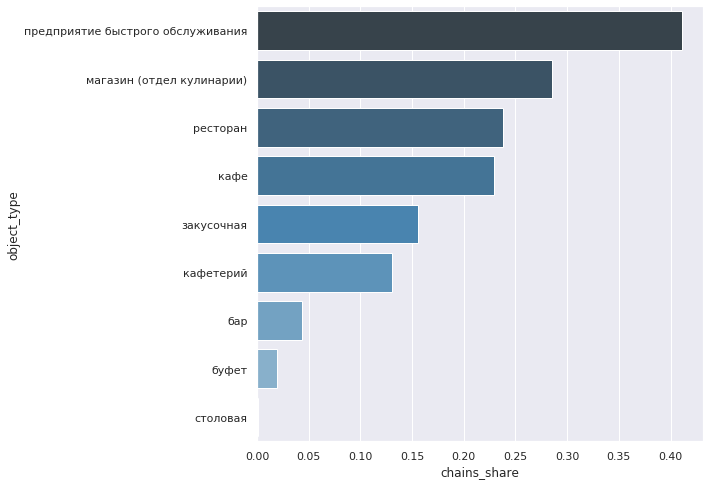

In [10]:
sns.barplot(y="object_type", x="chains_share", data=types_chain, palette="Blues_d")

Тип заведений, с наибольшей долей сетевых точек, - предприятия быстрого обслуживания.  
Любопытно, что на втором месте - отделы кулинарии в магазинах, за счет высокой доли сетей в продуктом ритейле.

### Сетевые заведения: количество точек или количество посадочных мест

Попробуем понять, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?  
Сделаем это несколькими способами, чтобы выявить наилучший метод визуализации.

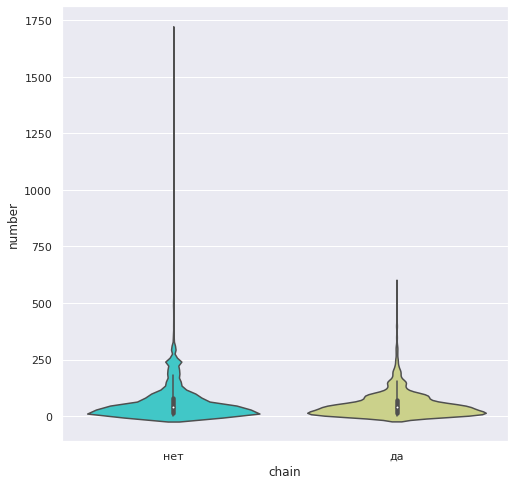

In [11]:
sns.violinplot(x="chain", y="number", data=data, palette='rainbow')

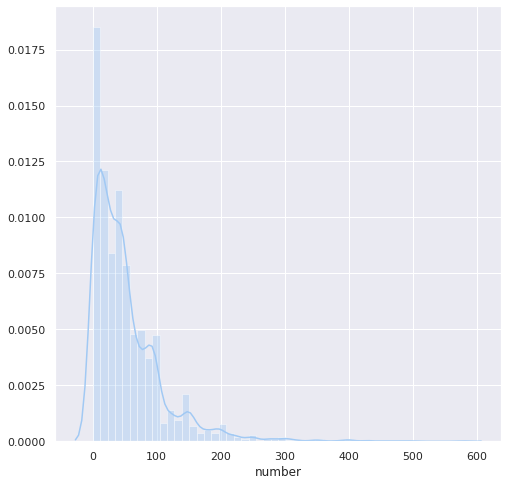

In [12]:
sns.distplot(data.query('chain=="да"')['number'])

Text(0, 0.5, 'Число посадочных мест')

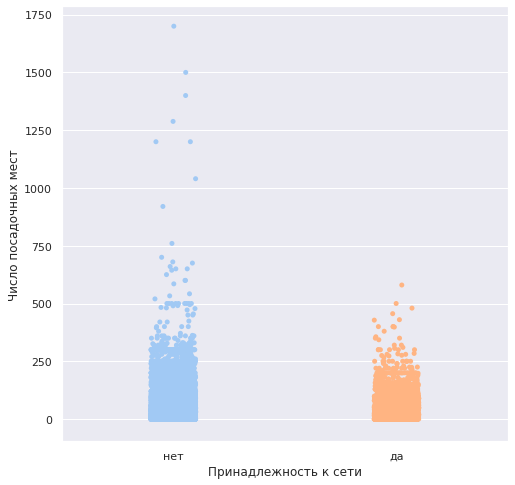

In [13]:
sns.stripplot(x="chain", y="number", data=data)
plt.xlabel('Принадлежность к сети')
plt.ylabel('Число посадочных мест')

Все три графика иллюстрируют одну и ту же мысль: сети предпочитают открывать много относительно небольших точек, что, по всей видимости, позволяет максимизировать прибыль на квадратный метр площади.  

### Среднее количество посадочных мест для различных видов заведений

Для каждого вида объекта общественного питания опишите среднее количество посадочных мест.  
Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

In [14]:
number_mean = data.pivot_table(index='object_type', values='number', aggfunc='mean').reset_index().sort_values(by='number', ascending=False)
number_mean

,object_type,number
8,столовая,130.246618
7,ресторан,96.834136
1,буфет,51.129915
0,бар,43.494159
3,кафе,39.716019
6,предприятие быстрого обслуживания,20.552262
4,кафетерий,9.123116
2,закусочная,7.608333
5,магазин (отдел кулинарии),5.589744


Text(0, 0.5, '')

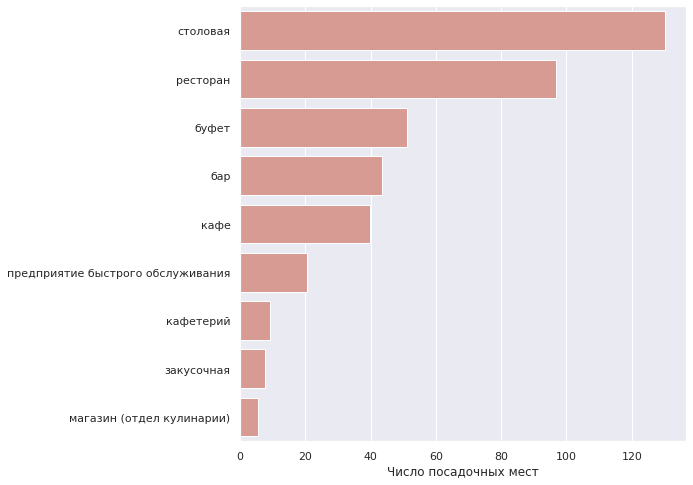

In [15]:
sns.barplot(y="object_type", x="number", data=number_mean, color="salmon", saturation=.5)
plt.xlabel('Число посадочных мест')
plt.ylabel('')

Итак, наибольшее количество посадочных мест предлагают столовые и рестораны, а наименьшее - отделы кулинарии в магазинах (далеко не везде они есть в принципе).

### Географический анализ заведений общественного питания

Выделим в отдельный столбец информацию об улице.

In [16]:
address_columns = data.address.str.split(',', expand=True)
address_columns.head(20)

,0,1,2,3,4,5,6
0,город Москва,улица Егора Абакумова,дом 9,None,None,None,None
1,город Москва,улица Талалихина,дом 2/1,корпус 1,None,None,None
2,город Москва,Абельмановская улица,дом 6,None,None,None,None
3,город Москва,Абрамцевская улица,дом 1,None,None,None,None
4,город Москва,Абрамцевская улица,дом 9,корпус 1,None,None,None
5,город Москва,Абрамцевская улица,дом 15,корпус 1,None,None,None
6,город Москва,переулок Сивцев Вражек,дом 6/2,None,None,None,None
7,город Москва,Авиамоторная улица,дом 8,строение 1,None,None,None
8,город Москва,Авиамоторная улица,дом 8,строение 1,None,None,None
9,город Москва,Авиамоторная улица,дом 8,строение 1,None,None,None


Создадим датафрейм с городом и названием улицы, объединим с исходным.

In [17]:
address_city_street = address_columns.iloc[:,:2]
address_city_street.set_axis(['city','street'],axis = 'columns',inplace = True)
data = data.join(address_city_street)
data.head(20)

,id,object_name,chain,object_type,address,number,city,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,город Москва,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,город Москва,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,город Москва,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,город Москва,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,город Москва,Абрамцевская улица
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240,город Москва,Абрамцевская улица
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,город Москва,переулок Сивцев Вражек
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90,город Москва,Авиамоторная улица
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150,город Москва,Авиамоторная улица
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120,город Москва,Авиамоторная улица


Теперь выделим топ-10 улиц с наибольшим количеством заведений.

In [18]:
street = data.groupby('street')['id'].count().reset_index().sort_values(by='id', ascending=False)
street.set_axis(['street','number'],axis = 'columns',inplace = True)
street.head(20)

,street,number
1334,город Зеленоград,232
1452,проспект Мира,204
993,Профсоюзная улица,182
683,Ленинградский проспект,171
979,Пресненская набережная,167
407,Варшавское шоссе,161
686,Ленинский проспект,147
1419,поселение Сосенское,138
1449,проспект Вернадского,132
674,Кутузовский проспект,114


Зеленоград и Сосенское поселение попали в топ по случайности. Посмотрим, почему.

In [19]:
data.query('street == " город Зеленоград"').head(20)

,id,object_name,chain,object_type,address,number,city,street
1386,22331,СТОЛОВАЯ МИЭТ,нет,столовая,"город Москва, город Зеленоград, улица Юности, ...",56,город Москва,город Зеленоград
1405,20199,ЭТО,нет,кафе,"город Москва, город Зеленоград, корпус 401",35,город Москва,город Зеленоград
1406,68113,Френдс,нет,кафе,"город Москва, город Зеленоград, корпус 435",34,город Москва,город Зеленоград
1407,20105,Кафе «Граф Монте-Кристо»,нет,кафе,"город Москва, город Зеленоград, корпус 436",40,город Москва,город Зеленоград
1408,22982,Альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",49,город Москва,город Зеленоград
1409,151267,Альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",45,город Москва,город Зеленоград
1410,150537,Кафе «Вечный зов»,нет,кафе,"город Москва, город Зеленоград, корпус 834А",30,город Москва,город Зеленоград
1411,128119,Кафе «Суши Сет»,да,предприятие быстрого обслуживания,"город Москва, город Зеленоград, корпус 1106",7,город Москва,город Зеленоград
1412,24023,Пекарня «Дружок-пирожок»,нет,кафетерий,"город Москва, город Зеленоград, корпус 1449",5,город Москва,город Зеленоград
1440,24022,Бар «ДЖАНГО»,нет,бар,"город Москва, город Зеленоград, корпус 1456",50,город Москва,город Зеленоград


Административно эти населенные пункты входят в состав Москвы, но в данном случае их не очень корректно сравнивать с улицами собственно города Москвы.  
Исключим их из списка.

In [20]:
street = street.query('street != " город Зеленоград" & street != " поселение Сосенское"')
street.head(20)

,street,number
1452,проспект Мира,204
993,Профсоюзная улица,182
683,Ленинградский проспект,171
979,Пресненская набережная,167
407,Варшавское шоссе,161
686,Ленинский проспект,147
1449,проспект Вернадского,132
674,Кутузовский проспект,114
600,Каширское шоссе,112
605,Кировоградская улица,110


Text(0, 0.5, '')

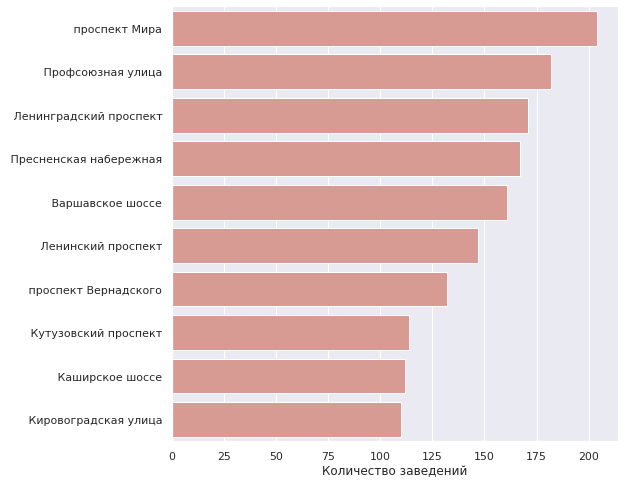

In [21]:
sns.barplot(y="street", x="number", data=street.iloc[:10], color="salmon", saturation=.5)
plt.xlabel('Количество заведений')
plt.ylabel('')

В основном, здесь представлены гигантские магистрали, которые, как шупальца, тянутся из центра Москвы к ее окраинам. 
Исключение составляют Пресненская набережная (Москва-Сити) и Кировоградская улица (нет идей :)).

Создадим датафрейм с улицами, на которых находится лишь один объект общественного питания.

In [22]:
street_one = street.query('number == 1')
street_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 1586 to 458
Data columns (total 2 columns):
street    579 non-null object
number    579 non-null int64
dtypes: int64(1), object(1)
memory usage: 13.6+ KB


Таких улиц оказалось 579...

Напишем функцию для парсинга названий улиц с сайта mosopen.ru.

In [23]:
import requests
from bs4 import BeautifulSoup
def street_parsing(district):
    BASE_URL = "http://mosopen.ru/district/"+district+"/streets"
    response = requests.get(BASE_URL)
    soup = BeautifulSoup(response.text, 'lxml')
    global variable 
    variable = []
    for row in soup.find_all('li'):
        variable.append(row.text)

Начнем с ЦАО.

In [24]:
street_parsing('cao')
cao=variable
cao

['Главная',
 'Территория\n\nОкруга и районы\nКарта города\nУлицы Москвы\nПочтовые индексы\nМетро\n\n',
 'Округа и районы',
 'Карта города',
 'Улицы Москвы',
 'Почтовые индексы',
 'Метро',
 'Куда обращаться',
 'Органы власти\n\nМосковские\nФедеральные\n\n',
 'Московские',
 'Федеральные',
 'Правовые акты\n\nОбщие сведения\nВсе правовые акты\nПоиск документов\n\n',
 'Общие сведения',
 'Все правовые акты',
 'Поиск документов',
 'Характеристика',
 'Органы власти',
 'Улицы округа',
 'Документы',
 '10-летия Октября, улица',
 '1905 Года, улица',
 'Абельмановская Застава, площадь',
 'Абельмановская улица',
 'Абрикосовский переулок',
 'Академика Петровского, улица',
 'Академика Сахарова, проспект',
 'Академика Туполева, набережная',
 'Александра Лукьянова, улица',
 'Александра Невского, переулок',
 'Александра Невского, улица',
 'Александра Солженицына, улица',
 'Ананьевский переулок',
 'Анатолия Живова, улица',
 'Андреевский мост',
 'Андроньевская набережная',
 'Андроньевская площадь',
 'Андрон

Получился какой-то более-менее вменяемый список.  
Проверим, какое количество совпадений с названиями из списка есть в нашем датафрейме street_one.

In [34]:
cao

['Главная',
 'Территория\n\nОкруга и районы\nКарта города\nУлицы Москвы\nПочтовые индексы\nМетро\n\n',
 'Округа и районы',
 'Карта города',
 'Улицы Москвы',
 'Почтовые индексы',
 'Метро',
 'Куда обращаться',
 'Органы власти\n\nМосковские\nФедеральные\n\n',
 'Московские',
 'Федеральные',
 'Правовые акты\n\nОбщие сведения\nВсе правовые акты\nПоиск документов\n\n',
 'Общие сведения',
 'Все правовые акты',
 'Поиск документов',
 'Характеристика',
 'Органы власти',
 'Улицы округа',
 'Документы',
 '10-летия Октября, улица',
 '1905 Года, улица',
 'Абельмановская Застава, площадь',
 'Абельмановская улица',
 'Абрикосовский переулок',
 'Академика Петровского, улица',
 'Академика Сахарова, проспект',
 'Академика Туполева, набережная',
 'Александра Лукьянова, улица',
 'Александра Невского, переулок',
 'Александра Невского, улица',
 'Александра Солженицына, улица',
 'Ананьевский переулок',
 'Анатолия Живова, улица',
 'Андреевский мост',
 'Андроньевская набережная',
 'Андроньевская площадь',
 'Андрон

In [39]:
street_one.query('street == @cao')['street'].count()

0

Хм, ни одного ((. Возможно, проблема в написании?

Попробуем проделать такую же операцию с Северным округом.

In [26]:
street_parsing('cao')
street_one.query('street == @variable')['street'].count()

0

Та же история... Возьмем еще какой-нибудь округ.

In [41]:
street_parsing('zao')
street_one.query('street == @variable')['street'].count()

0

Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.

Для начала создадим список с ТОП-10 улиц по количеству объектов общественного питания.

In [28]:
street_top = street.iloc[:10,0].reset_index(drop=True)
street_top

0              проспект Мира
1          Профсоюзная улица
2     Ленинградский проспект
3     Пресненская набережная
4           Варшавское шоссе
5         Ленинский проспект
6       проспект Вернадского
7       Кутузовский проспект
8            Каширское шоссе
9       Кировоградская улица
Name: street, dtype: object

In [29]:
street_top_list = []
for element in street_top:
    street_top_list.append(element)
street_top_list

[' проспект Мира',
 ' Профсоюзная улица',
 ' Ленинградский проспект',
 ' Пресненская набережная',
 ' Варшавское шоссе',
 ' Ленинский проспект',
 ' проспект Вернадского',
 ' Кутузовский проспект',
 ' Каширское шоссе',
 ' Кировоградская улица']

In [30]:
data_street_top = data.query('street == @street_top_list')
data_street_top.head()

,id,object_name,chain,object_type,address,number,city,street
151,155973,Кафе «Андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,город Москва,Варшавское шоссе
152,23618,Кафе «Subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,город Москва,Варшавское шоссе
153,155852,Кафе «Ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,город Москва,Варшавское шоссе
154,152556,Шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,город Москва,Варшавское шоссе
155,120658,Выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,город Москва,Варшавское шоссе


Text(0, 0.5, '')

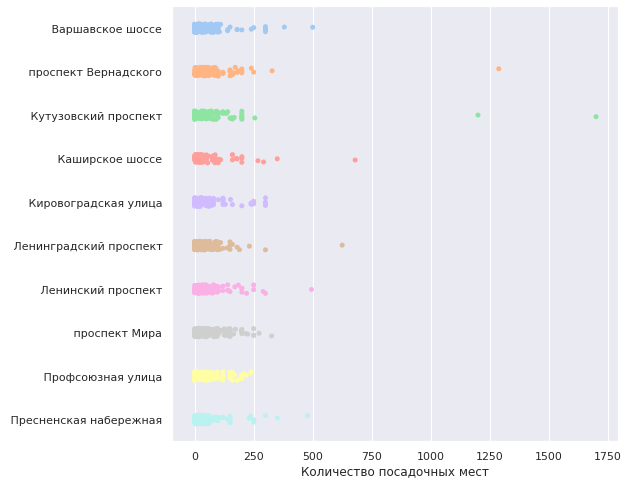

In [31]:
sns.stripplot(y="street", x="number", data=data_street_top)
plt.xlabel('Количество посадочных мест')
plt.ylabel('')

На наиболее популярных улицах подавляющее число заведений имеет менее 200 посадочных мест.

## Выводы

1. Наиболее распространенные виды заведений общественного питания - кафе, столовые, рестораны, предприятия быстрого обслуживания. На эти типы заведений приходится в совокупности более 80% заведений.  
2. К сетевым относятся лишь 19% заведений, причем наибольшая доля сетей в фастфуде, а наименьшая - среди столовых.  
3. Сети предпочитают открывать много относительно небольших точек, что, по всей видимости, позволяет максимизировать прибыль на квадратный метр площади, поскольку объем рынка конкретной локации ограничен.  
4. Наибольшее количество посадочных мест предлагают столовые (около 130) и рестораны (около 100).  
5. Заведения концентрируются в центре города, а также возле ключевых магистралей Москвы.  

Кафе, в котором обслуживают роботы, - инновационный формат, который может привлечь гостей со всего города.  
Имеет смысл выбрать локацию с удобной транспортной доступностью (возле метро, в центре города), а также в районах с сформировавшимися "гастрономическими кластерами" (например, центральные участки крупных магистралей).  
Сам формат кафе предполагает, что заведение уникально и будет представлено в единственном виде. Конечно, не стоит исключать возможности масштабирования бизнеса в будущем, но на текущий момент - это несетевое заведение.  
Рекомендуемое количество посадочных мест - среднее для формата кафе: 40 человек.